# 🧠 Post-Pandemic Remote Work & Health Impact (2025)

| Column Name                 | Description                                                                                                     |
| --------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **Survey_Date**             | The date on which the survey was conducted (in `YYYY-MM-DD` format).                                            |
| **Age**                     | The participant’s age.                                                                                          |
| **Gender**                  | The participant’s gender (e.g., Male, Female, Non-binary).                                                      |
| **Region**                  | The participant’s geographical region or continent (e.g., Asia, Europe, North America).                         |
| **Industry**                | The industry in which the participant is employed (e.g., Education, Manufacturing, Professional Services).      |
| **Job_Role**                | The participant’s job role or title (e.g., Data Analyst, DevOps Engineer).                                      |
| **Work_Arrangement**        | The participant’s working arrangement (e.g., Remote, Onsite, Hybrid).                                           |
| **Hours_Per_Week**          | The average number of hours worked per week.                                                                    |
| **Mental_Health_Status**    | The self-reported mental health condition of the participant (e.g., Depression, Anxiety, ADHD, None).           |
| **Burnout_Level**           | The participant’s reported level of burnout (e.g., Low, Medium, High).                                          |
| **Work_Life_Balance_Score** | A score representing work–life balance (typically on a 1–5 scale, where 5 indicates the best balance).          |
| **Physical_Health_Issues**  | Physical health issues experienced by the participant (e.g., Back Pain, Eye Strain; None).                      |
| **Social_Isolation_Score**  | The level of social isolation (likely measured on a 1–5 scale, where higher values indicate greater isolation). |
| **Salary_Range**            | The participant’s salary range (e.g., $40K–60K, $80K–100K).                                                     |


# Data Cleaning & EDA

---

## 📍 1. Introduction

This study aims to understand the impact of remote work on health in the post-pandemic period. The objective is to explore patterns in the data, appropriately handle outliers and missing values, and then analyze relationships through data visualizations.

## 📂 2. Exploratory Data Overview

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Import the data and display first 10 rows

In [36]:
df = pd.read_csv("post_pandemic_remote_work_health_impact_2025.csv")
df.head(10)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
5,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K
6,2025-06-01,50,Female,Asia,Manufacturing,IT Support,Onsite,62,NaN,Medium,4,Back Pain; Shoulder Pain; Wrist Pain,2,$80K-100K
7,2025-06-01,63,Non-binary,Europe,Professional Services,Technical Writer,Onsite,55,Anxiety,High,3,NaN,2,$100K-120K
8,2025-06-01,30,Female,South America,Technology,Software Engineer,Remote,47,Anxiety,Medium,2,Neck Pain,4,$60K-80K
9,2025-06-01,37,Female,Asia,Finance,HR Manager,Onsite,55,Burnout,Medium,5,Back Pain,1,$60K-80K


### Identify the number of rows and columns

In [115]:
df.shape

(3157, 14)

In [4]:
df.dtypes

Survey_Date                object
Age                         int64
Gender                     object
Region                     object
Industry                   object
Job_Role                   object
Work_Arrangement           object
Hours_Per_Week              int64
Mental_Health_Status       object
Burnout_Level              object
Work_Life_Balance_Score     int64
Physical_Health_Issues     object
Social_Isolation_Score      int64
Salary_Range               object
dtype: object

### What is the proportion of numerical and categorical columns?

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score',
       'Social_Isolation_Score'],
      dtype='object')
Categorical Columns: Index(['Survey_Date', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Work_Arrangement', 'Mental_Health_Status', 'Burnout_Level',
       'Physical_Health_Issues', 'Salary_Range'],
      dtype='object')


In [17]:
num_count = len(num_cols)
cat_count = len(cat_cols)
total_cols = df.shape[1]
print("Total Columns:", total_cols)

num_proportion = (num_count / total_cols) * 100
cat_proportion = (cat_count / total_cols) * 100
print(f"Numerical Columns Proportion: {num_proportion:.2f}%")
print(f"Categorical Columns Proportion: {cat_proportion:.2f}%")

Total Columns: 14
Numerical Columns Proportion: 28.57%
Categorical Columns Proportion: 71.43%


## 🧹 3. Handling Missing Values

### Check the missing values.

In [37]:
df.isnull().sum()

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

### Identify columns with a high percentage of missing data.

In [16]:
(df.isnull().sum() / len(df)) * 100

Survey_Date                 0.000000
Age                         0.000000
Gender                      0.000000
Region                      0.000000
Industry                    0.000000
Job_Role                    0.000000
Work_Arrangement            0.000000
Hours_Per_Week              0.000000
Mental_Health_Status       25.308838
Burnout_Level               0.000000
Work_Life_Balance_Score     0.000000
Physical_Health_Issues      8.869180
Social_Isolation_Score      0.000000
Salary_Range                0.000000
dtype: float64

### Decide on an appropriate imputation or deletion strategy.

#### Group-by Exploration for "Mental_Health_Status"

In [21]:
df.groupby('Work_Arrangement')['Mental_Health_Status'].value_counts(normalize=True)

Work_Arrangement  Mental_Health_Status
Hybrid            PTSD                    0.174560
                  ADHD                    0.173207
                  Anxiety                 0.165088
                  Burnout                 0.165088
                  Depression              0.163735
                  Stress Disorder         0.158322
Onsite            PTSD                    0.180905
                  Burnout                 0.173367
                  Depression              0.165829
                  Anxiety                 0.164992
                  Stress Disorder         0.159129
                  ADHD                    0.155779
Remote            PTSD                    0.183529
                  Anxiety                 0.176471
                  ADHD                    0.167059
                  Stress Disorder         0.167059
                  Depression              0.157647
                  Burnout                 0.148235
Name: proportion, dtype: float64

In [22]:
df.groupby('Industry')['Mental_Health_Status'].value_counts(normalize=True)

Industry               Mental_Health_Status
Customer Service       ADHD                    0.194030
                       PTSD                    0.171642
                       Stress Disorder         0.171642
                       Anxiety                 0.156716
                       Depression              0.156716
                       Burnout                 0.149254
Education              Burnout                 0.182266
                       Anxiety                 0.172414
                       Depression              0.172414
                       ADHD                    0.162562
                       Stress Disorder         0.157635
                       PTSD                    0.152709
Finance                Depression              0.212996
                       PTSD                    0.191336
                       Anxiety                 0.176895
                       Burnout                 0.155235
                       Stress Disorder         0.151625
    

In [23]:
df.groupby('Burnout_Level')['Mental_Health_Status'].value_counts(normalize=True)

Burnout_Level  Mental_Health_Status
High           PTSD                    0.182529
               Anxiety                 0.177314
               Stress Disorder         0.168188
               Depression              0.161669
               ADHD                    0.155150
               Burnout                 0.155150
Low            ADHD                    0.192920
               PTSD                    0.187611
               Burnout                 0.168142
               Anxiety                 0.162832
               Depression              0.155752
               Stress Disorder         0.132743
Medium         Burnout                 0.173489
               PTSD                    0.172515
               Depression              0.169591
               Stress Disorder         0.169591
               Anxiety                 0.161793
               ADHD                    0.153021
Name: proportion, dtype: float64

#### Group-by Exploration for "Physical_Health_Issues"

In [31]:
df.groupby('Work_Arrangement')['Physical_Health_Issues'].value_counts(normalize=True)

Work_Arrangement  Physical_Health_Issues                                     
Hybrid            Eye Strain                                                     0.098253
                  Shoulder Pain; Eye Strain                                      0.098253
                  Back Pain; Shoulder Pain                                       0.093886
                  Back Pain; Eye Strain                                          0.087336
                  Back Pain; Shoulder Pain; Eye Strain                           0.087336
                                                                                   ...   
Remote            Back Pain; Neck Pain; Wrist Pain                               0.007366
                  Back Pain; Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain    0.007366
                  Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain               0.005525
                  Shoulder Pain; Neck Pain; Wrist Pain                           0.005525
                  Eye 

In [32]:
df.groupby('Hours_Per_Week')['Physical_Health_Issues'].value_counts(normalize=True)

Hours_Per_Week  Physical_Health_Issues              
35              Back Pain                               0.118280
                Back Pain; Eye Strain                   0.107527
                Shoulder Pain; Eye Strain               0.086022
                Back Pain; Shoulder Pain                0.075269
                Back Pain; Shoulder Pain; Eye Strain    0.064516
                                                          ...   
65              Back Pain; Shoulder Pain; Wrist Pain    0.010989
                Back Pain; Wrist Pain                   0.010989
                Eye Strain; Neck Pain                   0.010989
                Neck Pain; Wrist Pain                   0.010989
                Shoulder Pain; Neck Pain                0.010989
Name: proportion, Length: 733, dtype: float64

In [33]:
df.groupby('Job_Role')['Physical_Health_Issues'].value_counts(normalize=True)

Job_Role         Physical_Health_Issues                                     
Account Manager  Back Pain; Shoulder Pain                                       0.125000
                 Eye Strain                                                     0.125000
                 Back Pain; Shoulder Pain; Eye Strain                           0.108333
                 Back Pain; Eye Strain                                          0.100000
                 Shoulder Pain                                                  0.091667
                                                                                  ...   
UX Designer      Back Pain; Neck Pain; Wrist Pain                               0.007812
                 Back Pain; Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain    0.007812
                 Back Pain; Shoulder Pain; Neck Pain                            0.007812
                 Neck Pain; Wrist Pain                                          0.007812
                 Wrist Pain      

### Is it more appropriate to drop missing values or to impute them?

In [38]:
df_copy = df.copy()

In [39]:
df_copy['Mental_Health_Status'].fillna(df_copy['Mental_Health_Status'].mode()[0], inplace=True)
df_copy['Physical_Health_Issues'].fillna(df_copy['Physical_Health_Issues'].mode()[0], inplace=True)

In [41]:
df_copy.isnull().sum()

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64

In [113]:
# dropping survey_date column as it is not relevant for analysis
df_copy.drop(columns=['Survey_Date'], inplace=True)
df_copy.head()

,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Age_Group,Hours_Bin
0,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,3,3,Shoulder Pain; Neck Pain,2,$40K-60K,25-34,60-69
1,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,3,4,Back Pain,2,$80K-100K,35-44,30-39
2,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,3,3,Shoulder Pain; Eye Strain,2,$80K-100K,25-34,30-39
3,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,2,1,Shoulder Pain; Eye Strain,2,$60K-80K,35-44,60-69
4,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,PTSD,2,5,Shoulder Pain; Eye Strain,4,$60K-80K,25-34,60-69


#### Create a new Salary_Numeric column

In [116]:
df_copy['Salary_Range'].unique()

array(['$40K-60K', '$80K-100K', '$60K-80K', '$100K-120K', '$120K+'],
      dtype=object)

In [119]:
def salary_to_numeric(salary):
    if pd.isna(salary):
        return np.nan
    
    salary = salary.lower().replace('k', '').replace('$', '').strip()
    
    # Case 1: Range (e.g., 40-60)
    if '-' in salary:
        low, high = salary.split('-')
        return (float(low) + float(high)) / 2
    
    # Case 2: Plus format (e.g., 100+)
    if '+' in salary:
        return float(salary.replace('+', ''))
    
    # Case 3: Single numeric value
    if salary.replace('.', '').isdigit():
        return float(salary)
    
    return np.nan
df_copy['Salary_Numeric'] = df_copy['Salary_Range'].apply(salary_to_numeric)
df_copy[['Salary_Range', 'Salary_Numeric']].head(10)

,Salary_Range,Salary_Numeric
0,$40K-60K,50.0
1,$80K-100K,90.0
2,$80K-100K,90.0
3,$60K-80K,70.0
4,$60K-80K,70.0
5,$60K-80K,70.0
6,$80K-100K,90.0
7,$100K-120K,110.0
8,$60K-80K,70.0
9,$60K-80K,70.0


## 🚨 4. Handling Outliers

### Detect outliers in numerical variables using the IQR

In [47]:
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score',
       'Social_Isolation_Score'],
      dtype='object')

In [48]:
outliers_dict = {}

for col in num_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)][col]
    outliers_dict[col] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Outliers Count': outliers.shape[0]}

outliers_dict


{'Age': {'Lower Bound': np.float64(0.0),
  'Upper Bound': np.float64(88.0),
  'Outliers Count': 0},
 'Hours_Per_Week': {'Lower Bound': np.float64(19.5),
  'Upper Bound': np.float64(79.5),
  'Outliers Count': 0},
 'Work_Life_Balance_Score': {'Lower Bound': np.float64(-1.0),
  'Upper Bound': np.float64(7.0),
  'Outliers Count': 0},
 'Social_Isolation_Score': {'Lower Bound': np.float64(-1.0),
  'Upper Bound': np.float64(7.0),
  'Outliers Count': 0}}

In [45]:
outliers_dict_clean = {}

for col, stats in outliers_dict.items():
    outliers_dict_clean[col] = {
        'Lower Bound': float(stats['Lower Bound']),
        'Upper Bound': float(stats['Upper Bound']),
        'Outliers Count': int(stats['Outliers Count'])
    }

outliers_dict_clean

{'Age': {'Lower Bound': 0.0, 'Upper Bound': 88.0, 'Outliers Count': 0},
 'Hours_Per_Week': {'Lower Bound': 19.5,
  'Upper Bound': 79.5,
  'Outliers Count': 0},
 'Work_Life_Balance_Score': {'Lower Bound': -1.0,
  'Upper Bound': 7.0,
  'Outliers Count': 0},
 'Social_Isolation_Score': {'Lower Bound': -1.0,
  'Upper Bound': 7.0,
  'Outliers Count': 0}}

### Visualize them using boxplots

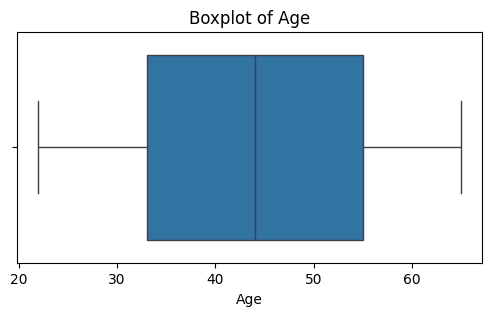

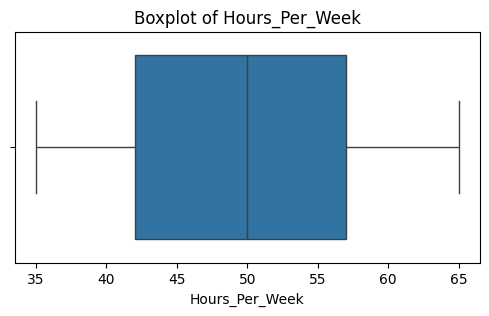

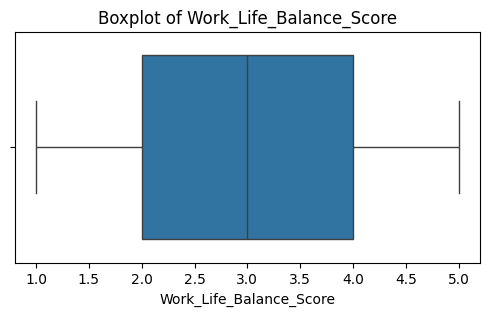

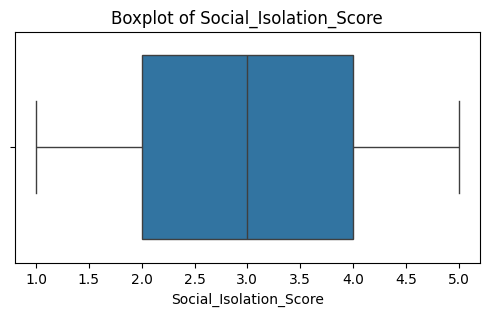

In [49]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_copy[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Visualize them using scatterplots.

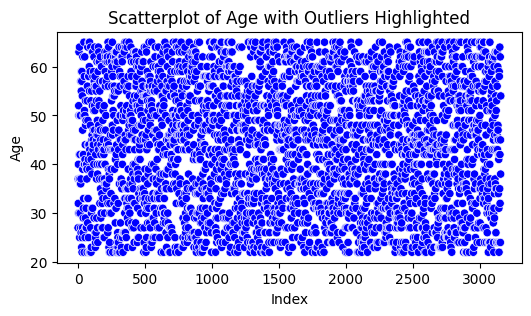

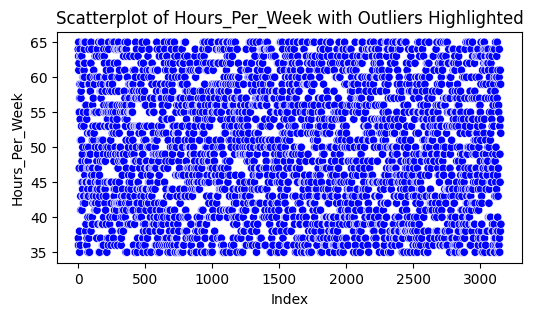

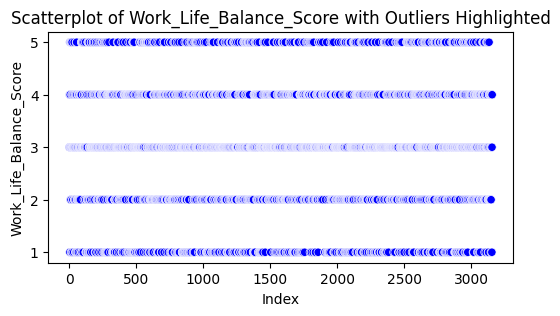

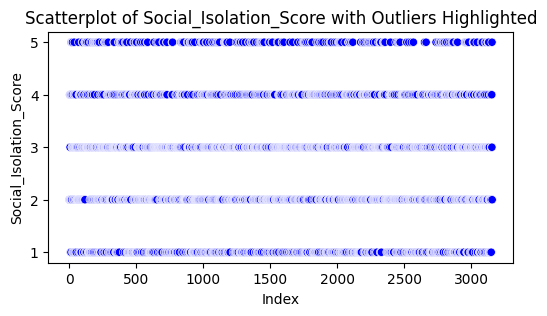

In [51]:
threshold = 3  # Z-score threshold for outliers

for col in num_cols:
    plt.figure(figsize=(6,3))
    
    # Calculate z-scores
    z_scores = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    
    # Create a column to indicate outliers
    df_copy['Outlier'] = z_scores.abs() > threshold
    
    # Scatterplot using Seaborn
    sns.scatterplot(x=df_copy.index, y=df_copy[col], hue=df_copy['Outlier'],
                    palette={True:'red', False:'blue'}, legend=False)
    
    plt.title(f"Scatterplot of {col} with Outliers Highlighted")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()

# Remove temporary column after plotting
df_copy.drop(columns=['Outlier'], inplace=True)

### Remove, cap, or transform these values using an appropriate method.

- Age → all values are within 0–88 → no action

- Hours_Per_Week → all within 19.5–79.5 → no action

- Work_Life_Balance_Score → all within -1–7 → no action

- Social_Isolation_Score → all within -1–7 → no action

## 🔍 5. Exploratory Data Analysis (EDA)

### Summarize basic descriptive statistics.

In [120]:
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

df_copy[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3157.0,43.732024,12.661095,22.0,33.0,44.0,55.0,65.0
Hours_Per_Week,3157.0,49.904973,8.897699,35.0,42.0,50.0,57.0,65.0
Burnout_Level,3157.0,2.095344,0.747260,1.0,2.0,2.0,3.0,3.0
Work_Life_Balance_Score,3157.0,2.996516,1.163307,1.0,2.0,3.0,4.0,5.0
Social_Isolation_Score,3157.0,2.704783,1.188887,1.0,2.0,3.0,4.0,5.0
Salary_Numeric,3157.0,82.017738,21.009436,50.0,70.0,90.0,90.0,120.0


### Create frequency tables for categorical variables.

In [121]:
cat_cols = df_copy.select_dtypes(include='object').columns

for col in cat_cols:
    if df_copy[col].nunique() <= 20:  # Adjust threshold as needed
        print(f"\nFrequency Table for '{col}':")
        freq_table = df_copy[col].value_counts().reset_index()
        freq_table.columns = [col, 'Count']
        freq_table['Percentage'] = round((freq_table['Count'] / df_copy.shape[0]) * 100, 2)
        print(freq_table)
        print("-"*50)


Frequency Table for 'Gender':
              Gender  Count  Percentage
0               Male   1535       48.62
1             Female   1500       47.51
2         Non-binary     90        2.85
3  Prefer not to say     32        1.01
--------------------------------------------------

Frequency Table for 'Region':
          Region  Count  Percentage
0  South America    575       18.21
1         Africa    532       16.85
2        Oceania    523       16.57
3           Asia    517       16.38
4         Europe    513       16.25
5  North America    497       15.74
--------------------------------------------------

Frequency Table for 'Industry':
                Industry  Count  Percentage
0  Professional Services    730       23.12
1             Technology    593       18.78
2          Manufacturing    370       11.72
3                Finance    367       11.62
4              Education    287        9.09
5             Healthcare    247        7.82
6              Marketing    202        6.40

### Perform correlation analysis.

In [122]:
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

# Compute Pearson correlation matrix
corr_matrix = df_copy[num_cols].corr().round(2)  # round to 2 decimals
corr_matrix

,Age,Hours_Per_Week,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score,Salary_Numeric
Age,1.00,0.00,-0.00,-0.02,-0.00,0.02
Hours_Per_Week,0.00,1.00,-0.01,-0.01,-0.00,0.03
Burnout_Level,-0.00,-0.01,1.00,-0.02,0.04,-0.01
Work_Life_Balance_Score,-0.02,-0.01,-0.02,1.00,-0.00,0.01
Social_Isolation_Score,-0.00,-0.00,0.04,-0.00,1.00,0.00
Salary_Numeric,0.02,0.03,-0.01,0.01,0.00,1.00


### How does the duration of remote work affect health-related indicators?

In [124]:
df_copy.head()

,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Age_Group,Hours_Bin,Salary_Numeric
0,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,3,3,Shoulder Pain; Neck Pain,2,$40K-60K,25-34,60-69,50.0
1,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,3,4,Back Pain,2,$80K-100K,35-44,30-39,90.0
2,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,3,3,Shoulder Pain; Eye Strain,2,$80K-100K,25-34,30-39,90.0
3,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,2,1,Shoulder Pain; Eye Strain,2,$60K-80K,35-44,60-69,70.0
4,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,PTSD,2,5,Shoulder Pain; Eye Strain,4,$60K-80K,25-34,60-69,70.0


#### Update the Burnout_Level to numeric value

- This will help us to analyse the data better

In [80]:
burnout_mapping = {'low': 1, 'medium': 2, 'high': 3}

df_copy['Burnout_Level'] = df_copy['Burnout_Level'].str.lower().map(burnout_mapping)

In [81]:
df_copy.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,3,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,3,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,3,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,2,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,PTSD,2,5,Shoulder Pain; Eye Strain,4,$60K-80K


In [82]:
num_health_vars = ['Burnout_Level', 'Work_Life_Balance_Score', 'Social_Isolation_Score']

# Ensure other numerical health columns are numeric
for col in ['Work_Life_Balance_Score', 'Social_Isolation_Score']:
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

# Compute group means
remote_effect_num = df_copy.groupby('Work_Arrangement')[num_health_vars].mean().round(2)
remote_effect_num

,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score
Work_Arrangement,,,
Hybrid,2.17,2.95,2.75
Onsite,1.96,3.03,2.38
Remote,2.33,2.99,3.50


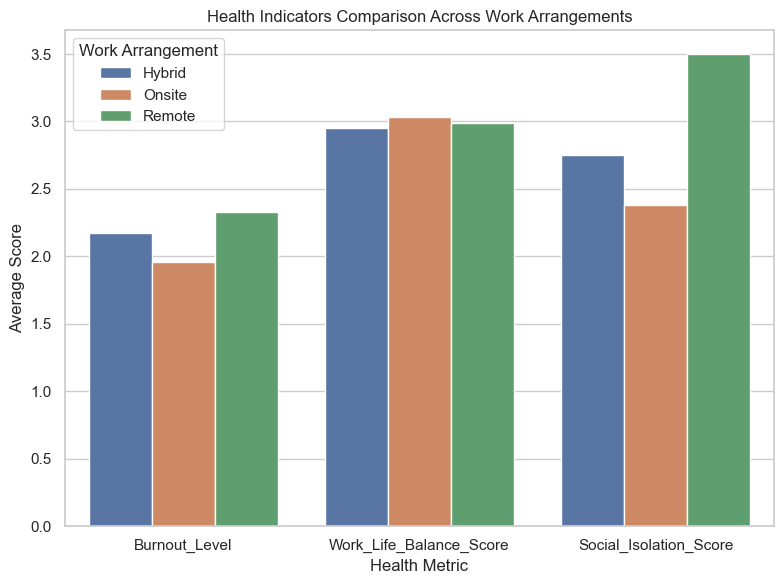

In [131]:
remote_effect_plot = remote_effect_num.reset_index()
remote_effect_melted = remote_effect_plot.melt(
    id_vars='Work_Arrangement',
    value_vars=num_health_vars,
    var_name='Health_Metric',
    value_name='Average_Score'
)
plt.figure(figsize=(8, 6))

sns.barplot(
    data=remote_effect_melted,
    x='Health_Metric',
    y='Average_Score',
    hue='Work_Arrangement'
)

plt.title('Health Indicators Comparison Across Work Arrangements')
plt.xlabel('Health Metric')
plt.ylabel('Average Score')
plt.legend(title='Work Arrangement', loc='upper left')
plt.tight_layout()
plt.show()


### Which age group has the highest stress levels?

In [ ]:
# Define age bins (adjust ranges as needed)
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df_copy['Age_Group'] = pd.cut(df_copy['Age'], bins=age_bins, labels=age_labels, right=False)

In [134]:
# Group by age group and compute average burnout
age_stress = df_copy.groupby('Age_Group')['Burnout_Level'].mean().round(2)
age_stress

Age_Group
18-24    2.10
25-34    2.10
35-44    2.12
45-54    2.05
55-64    2.11
65+      2.16
Name: Burnout_Level, dtype: float64

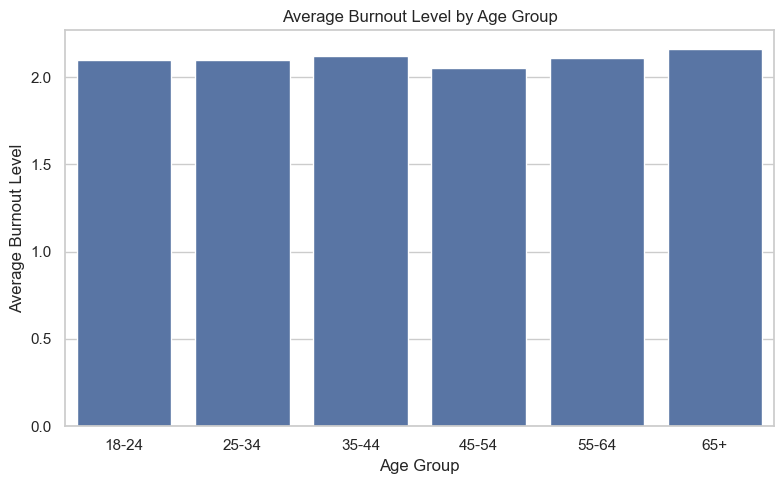

In [136]:
# Define age bins and labels
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create Age_Group
df_copy['Age_Group'] = pd.cut(df_copy['Age'], bins=age_bins, labels=age_labels, right=False)

# Compute average burnout by age group
age_stress = df_copy.groupby('Age_Group')['Burnout_Level'].mean().round(2).reset_index()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(
    data=age_stress,
    x='Age_Group',
    y='Burnout_Level'
)

plt.title('Average Burnout Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Burnout Level')
plt.tight_layout()
plt.show()


## 📊 6. Data Visualization

In [85]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6,4)

### Data Visualization with Histograms for or Numerical Variables

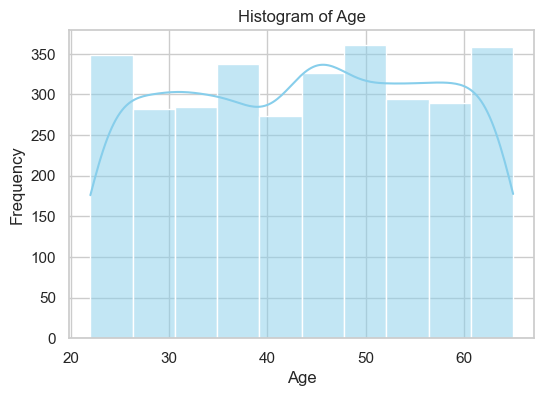

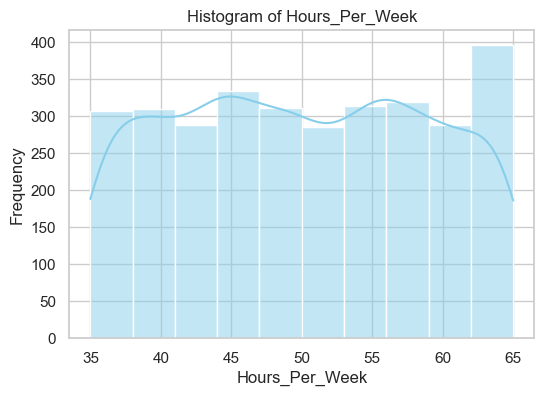

In [138]:
num_cols = ['Age', 'Hours_Per_Week']

for col in num_cols:
    plt.figure()
    sns.histplot(df_copy[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

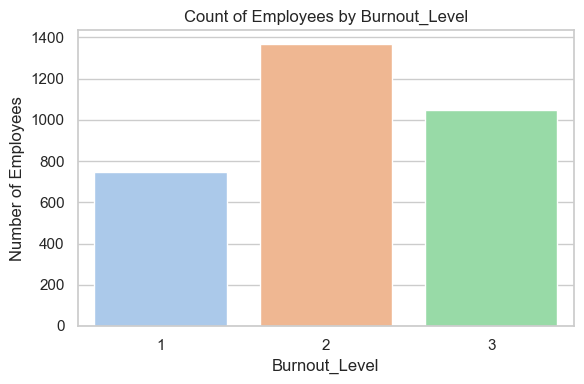

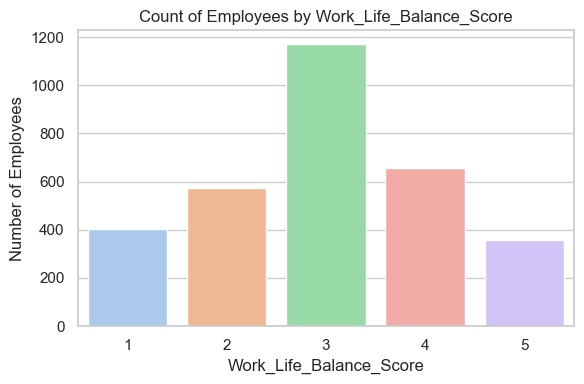

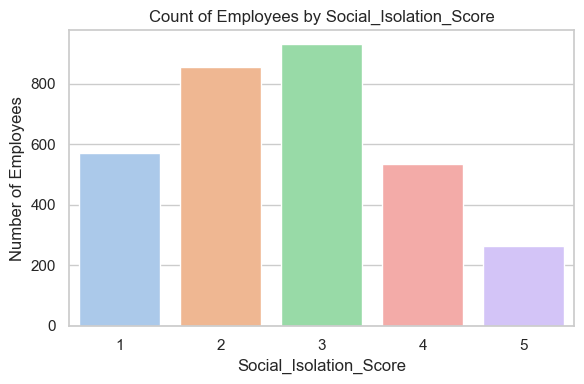

In [139]:
# Discrete numeric variables
discrete_vars = ['Burnout_Level', 'Work_Life_Balance_Score', 'Social_Isolation_Score']

for col in discrete_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(
        x=col,
        data=df_copy,
        palette='pastel',
        order=sorted(df_copy[col].dropna().unique())
    )
    plt.title(f'Count of Employees by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.tight_layout()
    plt.show()


### Data Visualization with Bar Charts for or Categorical Variables

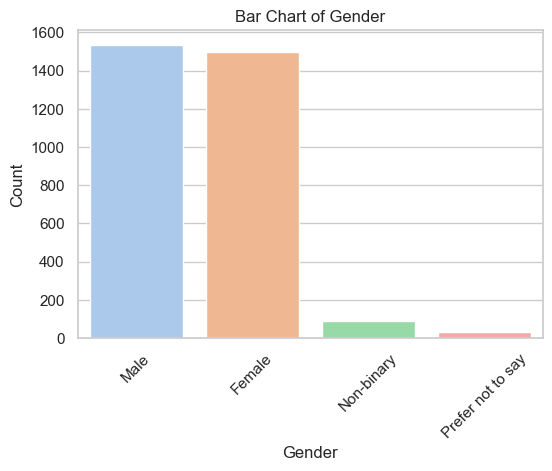

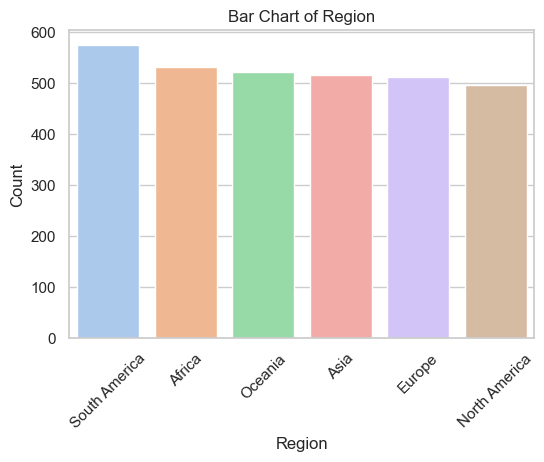

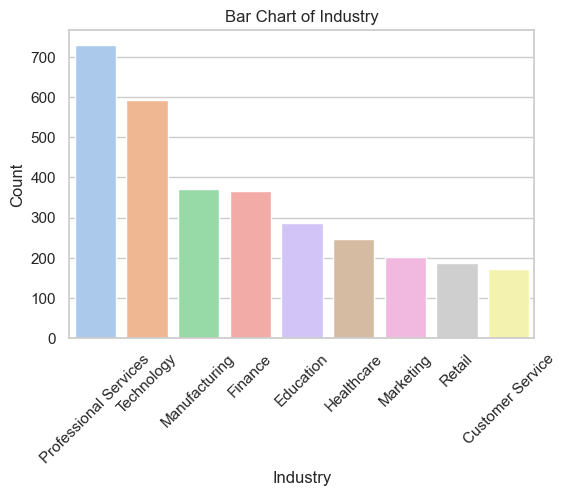

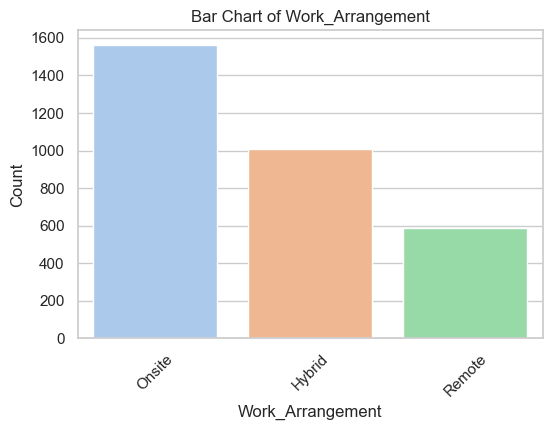

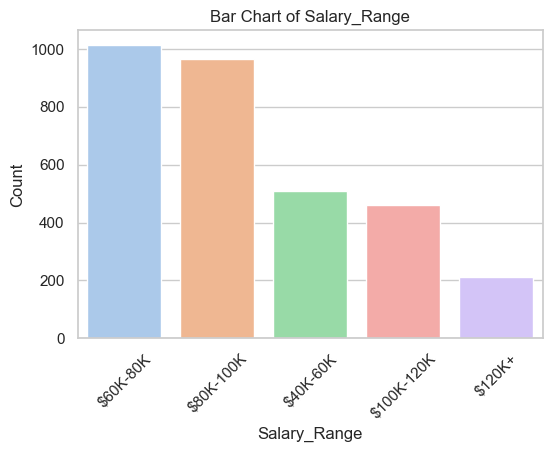

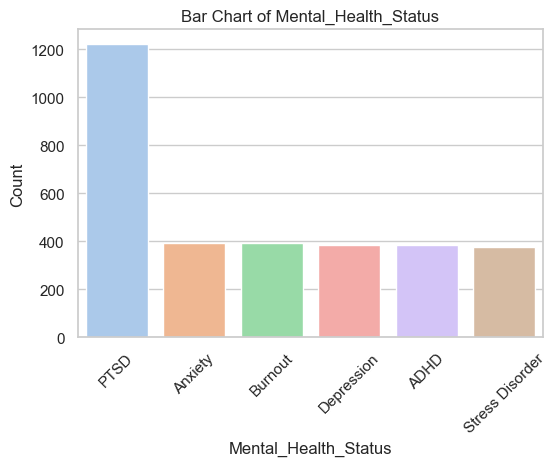

In [148]:
cat_cols = ['Gender', 'Region', 'Industry', 'Work_Arrangement', 'Salary_Range', 'Mental_Health_Status']

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df_copy, palette='pastel', order=df_copy[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


### Data Visualization with Pair Plot for Numerical Variables

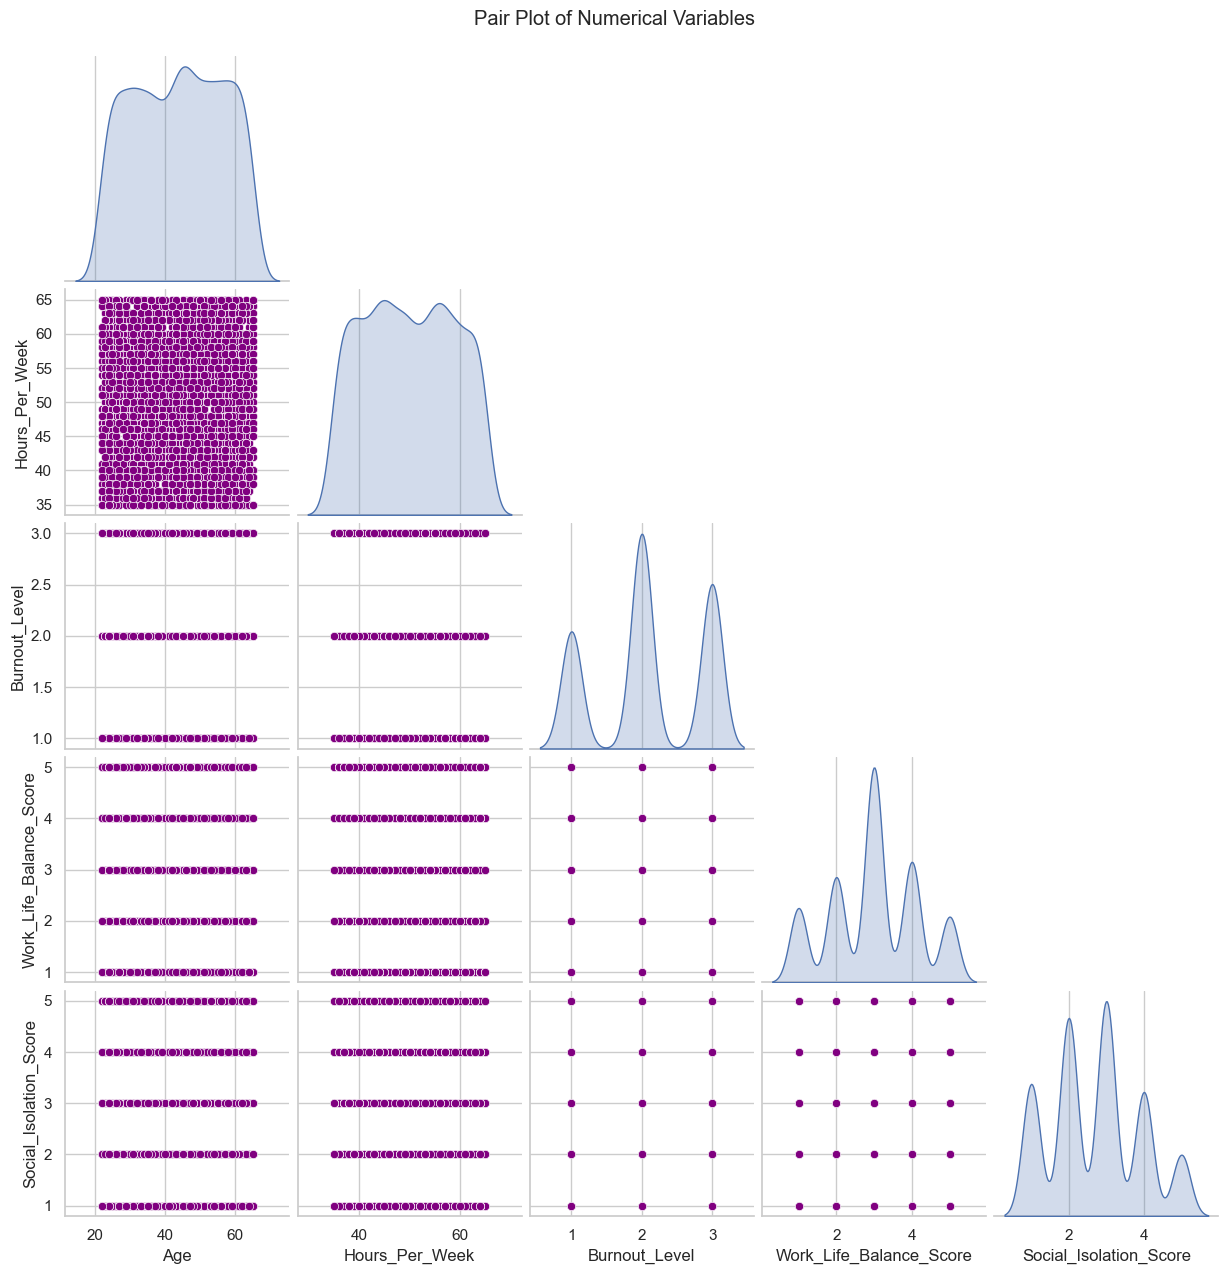

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [89]:
sns.pairplot(df_copy[num_cols], corner=True, diag_kind='kde', plot_kws={'color':'purple'})
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()
plt.figure(figsize=(10, 8))

### Data Visualization with Heatmap of Correlations

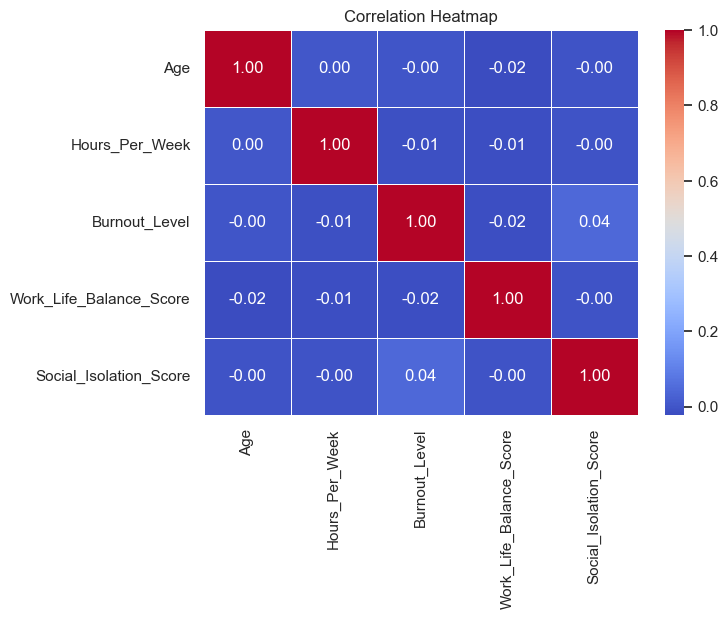

In [92]:
corr_matrix = df_copy[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Data Visualization with Line Plots for Trends

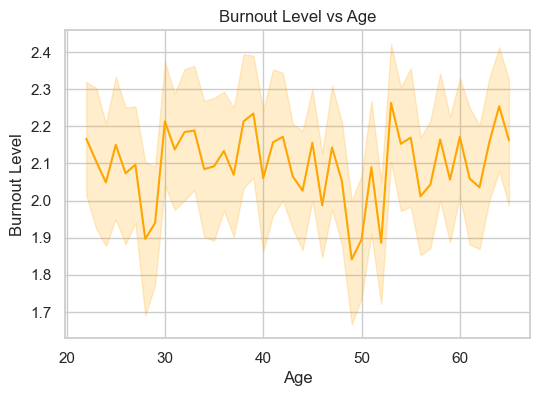

In [93]:
plt.figure()
sns.lineplot(x='Age', y='Burnout_Level', data=df_copy.sort_values('Age'), color='orange')
plt.title('Burnout Level vs Age')
plt.xlabel('Age')
plt.ylabel('Burnout Level')
plt.show()

### Relationship between sleep duration and productivity?

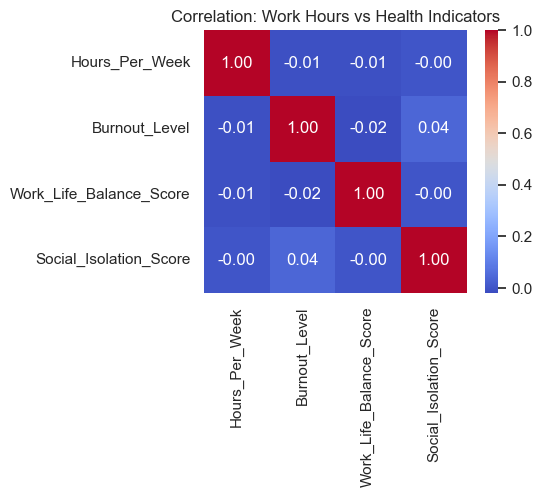

In [146]:
# Correlation between work hours (proxy for productivity) and stress/health indicators
num_vars = ['Hours_Per_Week', 'Burnout_Level', 'Work_Life_Balance_Score', 'Social_Isolation_Score']

corr_matrix = df_copy[num_vars].corr().round(2)
corr_matrix
plt.figure(figsize=(6,5))
sns.heatmap(
    corr_matrix,
    annot=True,         # show correlation values
    fmt=".2f",          # two decimal places
    cmap='coolwarm',    # diverging colors: blue=negative, red=positive
    cbar=True,
    square=True
)
plt.title('Correlation: Work Hours vs Health Indicators')
plt.tight_layout()
plt.show()


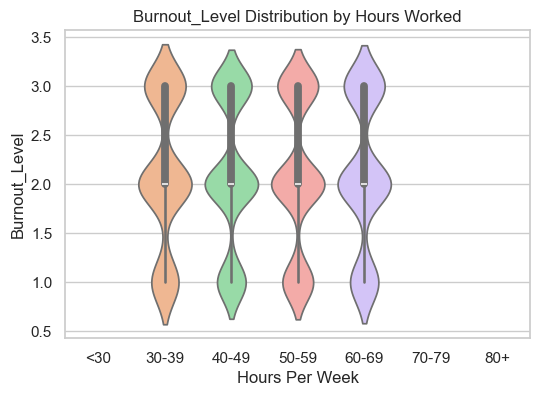

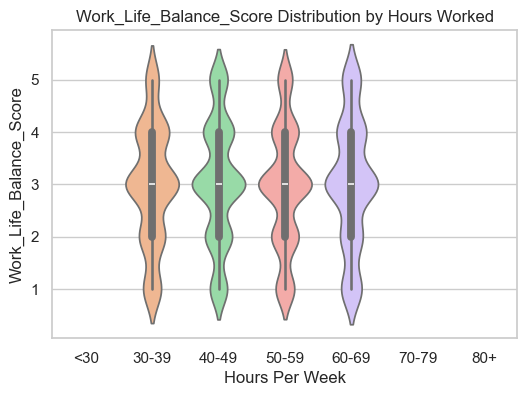

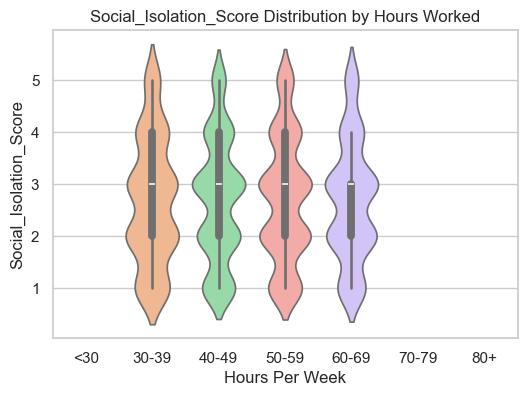

In [ ]:
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30','30-39','40-49','50-59','60-69','70-79','80+']
df_copy['Hours_Bin'] = pd.cut(df_copy['Hours_Per_Week'], bins=bins, labels=labels, right=False)

for var in health_vars:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Hours_Bin', y=var, data=df_copy, palette='pastel')
    plt.title(f'{var} Distribution by Hours Worked')
    plt.xlabel('Hours Per Week')
    plt.ylabel(var)
    plt.show()


### Do health indicators differ by gender or age group?

In [102]:
health_vars = ['Burnout_Level', 'Work_Life_Balance_Score', 'Social_Isolation_Score']

gender_stats = df_copy.groupby('Gender')[health_vars].mean().round(2)
gender_stats

,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score
Gender,,,
Female,2.11,3.02,2.68
Male,2.08,2.97,2.73
Non-binary,2.07,3.14,2.61
Prefer not to say,2.03,2.84,2.78


In [103]:
age_stats = df_copy.groupby('Age_Group')[health_vars].mean().round(2)
age_stats

,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score
Age_Group,,,
18-24,2.10,3.11,2.70
25-34,2.10,3.06,2.71
35-44,2.12,2.96,2.71
45-54,2.05,2.98,2.70
55-64,2.11,2.93,2.69
65+,2.16,3.30,2.74


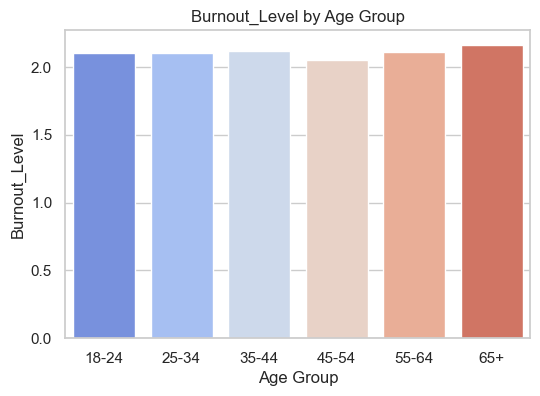

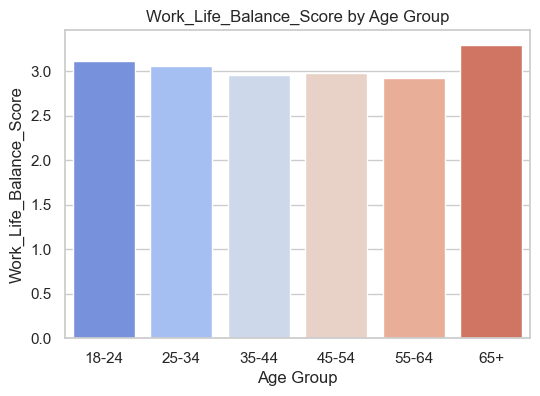

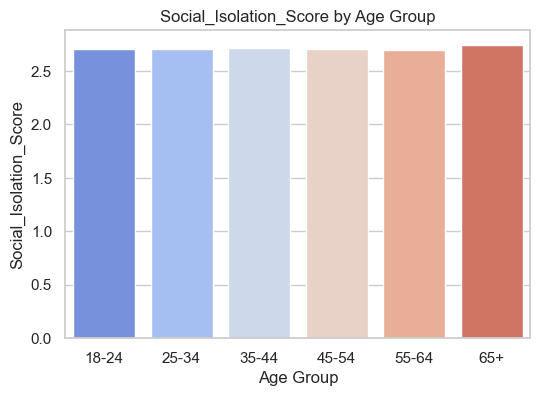

In [105]:
for var in health_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Age_Group', y=var, data=df_copy, palette='coolwarm', ci=None)
    plt.title(f'{var} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(var)
    plt.show()


### 🧩 7. Summary and Interpretation

### Burnout Level by Work Arrangement

- Remote workers experience higher average burnout than hybrid and onsite employees.

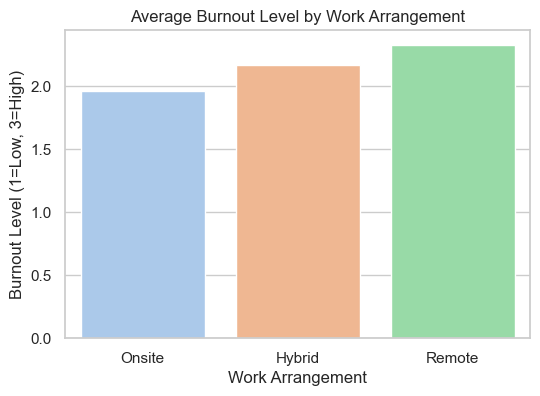

In [106]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='Work_Arrangement',
    y='Burnout_Level',
    data=df_copy,
    palette='pastel',
    ci=None
)
plt.title('Average Burnout Level by Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Burnout Level (1=Low, 3=High)')
plt.show()


### Social Isolation by Work Arrangement

- Social isolation is clearly highest for fully remote workers, lowest for onsite.

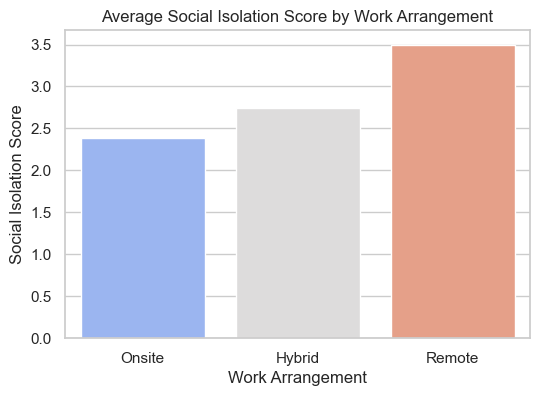

In [107]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='Work_Arrangement',
    y='Social_Isolation_Score',
    data=df_copy,
    palette='coolwarm',
    ci=None
)
plt.title('Average Social Isolation Score by Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Social Isolation Score')
plt.show()


### Work-Life Balance by Work Arrangement

- Work-life balance differences exist but are less pronounced than burnout or isolation.

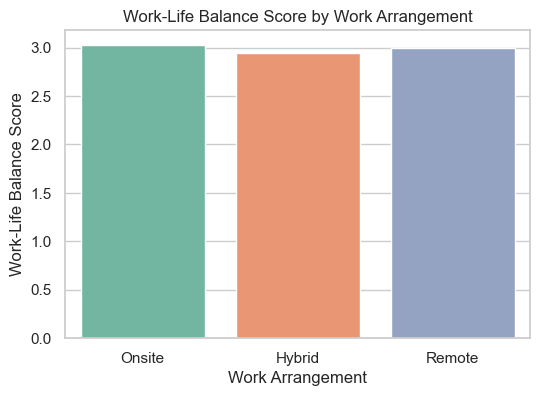

In [108]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='Work_Arrangement',
    y='Work_Life_Balance_Score',
    data=df_copy,
    palette='Set2',
    ci=None
)
plt.title('Work-Life Balance Score by Work Arrangement')
plt.xlabel('Work Arrangement')
plt.ylabel('Work-Life Balance Score')
plt.show()


### Burnout by Age Group

- Burnout tends to peak in mid-career age groups, indicating higher stress risk.

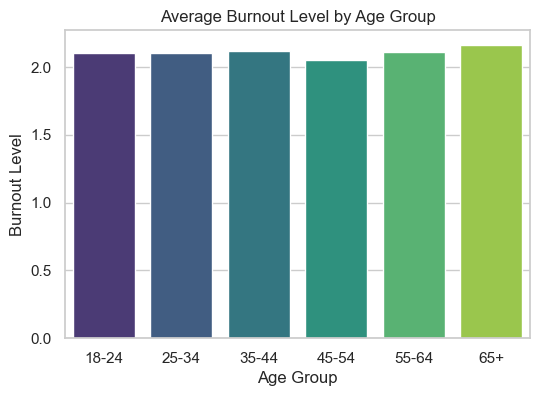

In [110]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='Age_Group',
    y='Burnout_Level',
    data=df_copy,
    palette='viridis',
    ci=None
)
plt.title('Average Burnout Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Burnout Level')
plt.show()


### Distribution of Stress Levels

- Most employees fall into medium stress, but a non-trivial portion is highly stressed.

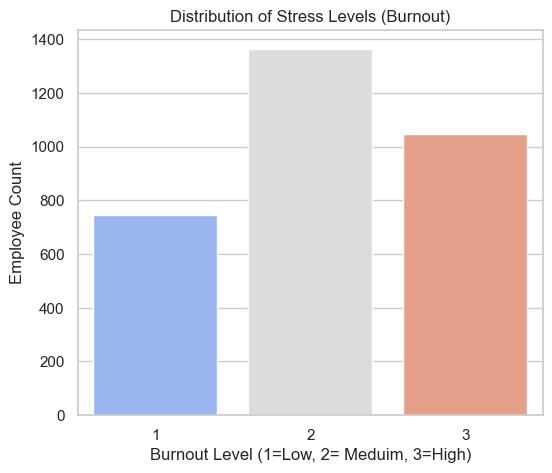

In [114]:
plt.figure(figsize=(6,5))
sns.countplot(
    x='Burnout_Level',
    data=df_copy,
    palette='coolwarm',
    order=[1,2,3]
)
plt.title('Distribution of Stress Levels (Burnout)')
plt.xlabel('Burnout Level (1=Low, 2= Meduim, 3=High)')
plt.ylabel('Employee Count')
plt.show()
